In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('assets/car_prices.csv')

df.head(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


### Data Preprocessing

In [3]:
# List all the num entries
df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [4]:
# List the dtypes
df.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr             float64
sellingprice    float64
saledate         object
dtype: object

In [5]:
# Removing unnecesarry columns
df.drop(["vin"], axis=1, inplace=True)

In [6]:
# Let's filling the missing values using the mean values
df["condition"].fillna(df["condition"].mean(),inplace=True)
df["odometer"].fillna(df["odometer"].mean(),inplace=True)
df["mmr"].fillna(df["mmr"].mean(),inplace=True)
df["sellingprice"].fillna(df["sellingprice"].mean(),inplace=True)

In [7]:
# Now we fill the missing values of strings with the mode value
df["color"].fillna(df["color"].mode()[0],inplace=True)
df["saledate"].fillna(df["saledate"].mode()[0],inplace=True)
df["interior"].fillna(df["interior"].mode()[0],inplace=True)
df["transmission"].fillna(df["transmission"].mode()[0],inplace=True)
df["body"].fillna(df["body"].mode()[0],inplace=True)
df["trim"].fillna(df["trim"].mode()[0],inplace=True)

In [8]:
df.isnull().sum()

year                0
make            10301
model           10399
trim                0
body                0
transmission        0
state               0
condition           0
odometer            0
color               0
interior            0
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

In [9]:
# Lets explore all the car manufactuers we have in this dataframe
df["make"].unique()

array(['Kia', 'BMW', 'Volvo', 'Nissan', 'Chevrolet', 'Audi', 'Ford',
       'Hyundai', 'Buick', 'Cadillac', 'Acura', 'Lexus', 'Infiniti',
       'Jeep', 'Mercedes-Benz', 'Mitsubishi', 'Mazda', 'MINI',
       'Land Rover', 'Lincoln', 'lincoln', 'Jaguar', 'Volkswagen',
       'Toyota', 'Subaru', 'Scion', 'Porsche', nan, 'bmw', 'Dodge',
       'FIAT', 'Chrysler', 'ford', 'Ferrari', 'Honda', 'GMC',
       'mitsubishi', 'Ram', 'smart', 'chevrolet', 'Bentley', 'chrysler',
       'pontiac', 'Pontiac', 'Saturn', 'Maserati', 'Mercury', 'HUMMER',
       'landrover', 'cadillac', 'land rover', 'mercedes', 'mazda',
       'toyota', 'lexus', 'gmc truck', 'honda', 'nissan', 'porsche',
       'Saab', 'Suzuki', 'dodge', 'subaru', 'Oldsmobile', 'oldsmobile',
       'hyundai', 'jeep', 'Isuzu', 'dodge tk', 'Geo', 'acura',
       'volkswagen', 'suzuki', 'kia', 'audi', 'Rolls-Royce', 'gmc',
       'maserati', 'mazda tk', 'mercury', 'buick', 'hyundai tk',
       'mercedes-b', 'vw', 'Daewoo', 'chev truck', 'f

## Exploratory Data Analysis

In [10]:
df

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Luxury,Sedan,automatic,in,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


#### Timeline of Vehicle Manufacturing 

<Axes: xlabel='year', ylabel='count'>

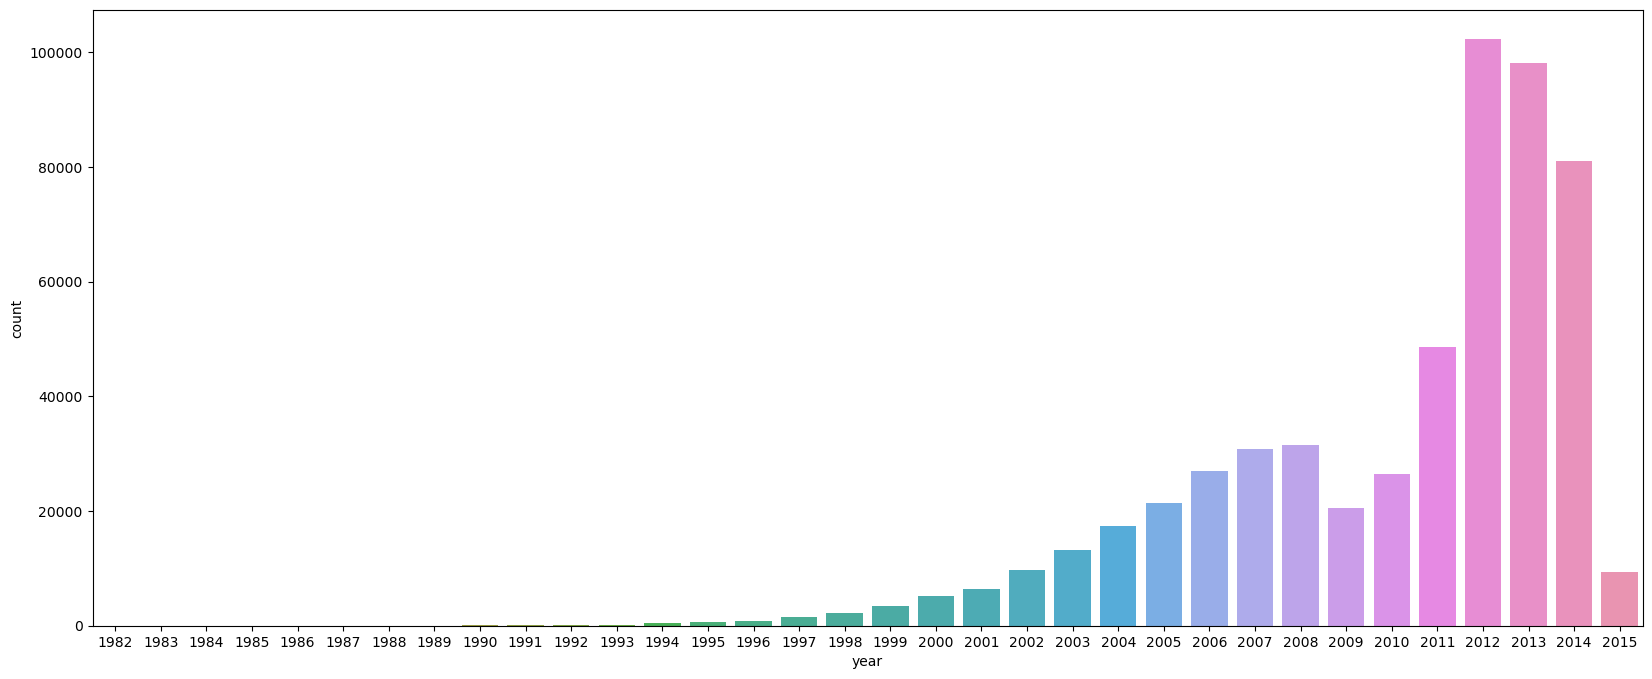

In [11]:
plt.figure(figsize=(20,8))
sns.countplot(x="year",data=df)

#### Number of Vehicle sales according to Make

In [12]:
# Number of vehicles sold by Make

yrsell = df.groupby("make")["year"].count().nlargest(15)
print(yrsell)

make
Ford             93554
Chevrolet        60197
Nissan           53946
Toyota           39871
Dodge            30710
Honda            27206
Hyundai          21816
BMW              20719
Kia              18077
Chrysler         17276
Mercedes-Benz    17141
Jeep             15372
Infiniti         15305
Volkswagen       12581
Lexus            11861
Name: year, dtype: int64


In [13]:
px.line(yrsell)

#### Top model sold by each of the top 15 brands

In [14]:
# Group by make and model, count the number of each model, and get the top 15
top_models = df.groupby(['make', 'model'])['year'].count().nlargest(15).reset_index()
print(top_models)

         make          model   year
0      Nissan         Altima  19349
1        Ford          F-150  14479
2        Ford         Fusion  12946
3      Toyota          Camry  12545
4        Ford         Escape  11861
5        Ford          Focus  10394
6       Honda         Accord   9127
7         BMW       3 Series   8204
8       Dodge  Grand Caravan   7941
9   Chevrolet         Impala   7923
10       Ford       Explorer   7707
11      Honda          Civic   7433
12   Infiniti        G Sedan   7417
13     Toyota        Corolla   7354
14  Chevrolet         Malibu   7028


In [15]:
# Create a histogram
px.histogram(top_models, x="model", y="year", color="make", title="Top Selling Model by Each Brand")

#### Color Selling Patterns

In [18]:
color = df.groupby("color")['year'].count().nlargest(6)
color

color
black     111719
white     106673
silver     83389
gray       82857
blue       51139
red        43569
Name: year, dtype: int64

([<matplotlib.patches.Wedge at 0x158128e90>,
 [Text(0.8180784096884889, 0.7353555028702465, 'black'),
  Text(-0.6144836886513358, 0.9123649469271868, 'white'),
  Text(-1.0608558920298166, -0.29083462026660856, 'silver'),
  Text(-0.2332393362091082, -1.074988098559577, 'gray'),
  Text(0.6783673767294496, -0.8659201476979302, 'blue'),
  Text(1.0554583197349081, -0.3098511502356645, 'red')],
 [Text(0.44622458710281204, 0.401103001565589, '23.3%'),
  Text(-0.33517292108254676, 0.4976536074148291, '22.3%'),
  Text(-0.5786486683798999, -0.1586370655999683, '17.4%'),
  Text(-0.127221456114059, -0.5863571446688601, '17.3%'),
  Text(0.37001856912515424, -0.4723200805625073, '10.7%'),
  Text(0.5757045380372225, -0.16900971831036246, '9.1%')])

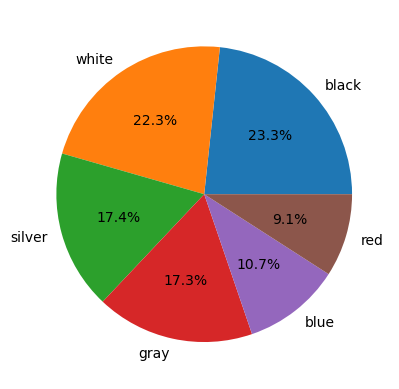

In [19]:
plt.pie(color,labels=color.index,autopct='%1.1f%%')